# Homework Assignment 2 

## Risk Graph

### (Notebook 2 of 2)



### <p style="text-align: right;"> &#9989; Ronnit </p>
### <p style="text-align: right;"> &#9989; KlutzyFella </p>

## Assignment Overview

In this assignment, we'll explore graphs using the board game Risk as our practical example. Risk is a strategy game played on a world map where territories are connected to their neighbors. This makes it a perfect candidate for graph representation and analysis.

### Learning Objectives

- Implement a graph representation of a real-world game board
- practice using networkx
- do some research
- visualize graph data using NetworkX

The assignment is split into two notebooks:
- Notebook 1 of 2 is worth **14 + 33 + 3 = 51 points** 
- Notebook 2 of 2 is worth **1+ 42 + 1 = 44 points** 
for a total of **95 points**. Point values for each part are included in the section headers and question prompts.

**This assignment is due at 11:59 pm on Friday, March 21st.** It should be uploaded into the "Homework Assignments" submission folder for Homework #2 on D2L.  Submission instructions can be found at the end of the notebook. **You must also fill out a survey regarding this assignment.** The link to this survey can also be found at the end of the notebook.

---
## &#128721; STOP
**Pause to add this file and commit your changes to your Git repository! (1 points)**

---

In [11]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np

---
<a id="part3"></a>
[Back to ToC](#toc)

## Part 3: Creating the Risk Game Graph (42 points)


![image](https://cf.geekdo-images.com/JM6hEipDwIByZKEIK9Dgeg__imagepage/img/OEl2gaJbUxdvIv6tNPzDsQyLUtQ=/fit-in/900x600/filters:no_upscale():strip_icc()/pic365731.jpg)


&#9989; **Question 3.1 (5 points)**: Create a dictionary that defines the territories in Risk, organized by continents. Each territory should include its neighboring territories. Use the image above for completing the code below

In [12]:
risk_territories = {
    'North America': {
        'Alaska': ['Northwest Territory', 'Alberta', 'Kamchatka'],
        'Northwest Territory': ['Alaska', 'Alberta', 'Greenland', 'Ontario'],
        'Greenland': ['Northwest Territory', 'Ontario', 'Quebec', 'Iceland'],
        'Alberta': ['Alaska', 'Northwest Territory', 'Ontario', 'Western United States'],
        'Ontario': ['Alberta', 'Northwest Territory', 'Greenland', 'Quebec', 'Western United States', 'Eastern United States'],
        'Quebec': ['Ontario', 'Greenland', 'Eastern United States'],
        'Western United States': ['Alberta', 'Ontario', 'Eastern United States', 'Central America'],
        'Eastern United States': ['Western United States', 'Ontario', 'Quebec', 'Central America'],
        'Central America': ['Western United States', 'Eastern United States', 'Venezuela']
    },
    # Complete the remaining continents
    'South America': {
        'Venezuela': ['Central America', 'Peru', 'Brazil'],
        'Peru': ['Venezuela', 'Brazil', 'Argentina'],
        'Brazil': ['Venezuela', 'Peru', 'Argentina', 'North Africa'],
        'Argentina': ['Peru', 'Brazil']
    },
    'Europe': {
        'Iceland': ['Greenland', 'Scandinavia', 'Great Britain'],
        'Scandinavia': ['Iceland', 'Great Britain', 'Northern Europe', 'Ukraine'],
        'Great Britain': ['Iceland', 'Scandinavia', 'Northern Europe', 'Western Europe'],
        'Northern Europe': ['Scandinavia', 'Great Britain', 'Western Europe', 'Southern Europe', 'Ukraine'],
        'Western Europe': ['Great Britain', 'Northern Europe', 'Southern Europe', 'North Africa'],
        'Southern Europe': ['Western Europe', 'Northern Europe', 'Ukraine', 'Egypt', 'North Africa', 'Middle East'],
        'Ukraine': ['Scandinavia', 'Northern Europe', 'Southern Europe', 'Middle East', 'Afghanistan', 'Ural'],
    },
    'Africa': {
        'North Africa': ['Western Europe', 'Southern Europe', 'Egypt', 'East Africa', 'Congo', 'Brazil'],
        'Egypt': ['North Africa', 'Southern Europe', 'Middle East', 'East Africa'],
        'East Africa': ['North Africa', 'Egypt', 'Middle East', 'South Africa', 'Congo', 'Madagascar'],
        'Congo': ['North Africa', 'East Africa', 'South Africa'],
        'South Africa': ['East Africa', 'Congo', 'Madagascar'],
        'Madagascar': ['East Africa', 'South Africa']
    },
    'Asia': {
        'Middle East': ['Egypt', 'East Africa', 'Afghanistan', 'India', 'Ukraine', 'Southern Europe'],
        'Afghanistan': ['Middle East', 'India', 'China', 'Ural', 'Ukraine'],
        'India': ['Middle East', 'Afghanistan', 'China', 'Siam'],
        'Siam': ['India', 'China', 'Indonesia'],
        'China': ['Afghanistan', 'India', 'Siam', 'Ural', 'Siberia', 'Mongolia'],
        'Ural': ['Ukraine', 'Afghanistan', 'Siberia', 'China'],
        'Siberia': ['Ural', 'China', 'Mongolia', 'Yakutsk', 'Irkutsk'],
        'Mongolia': ['Siberia', 'China', 'Japan', 'Kamchatka', 'Irkutsk'],
        'Irkutsk': ['Siberia', 'Yakutsk', 'Kamchatka', 'Mongolia'],
        'Yakutsk': ['Siberia', 'Kamchatka', 'Irkutsk'],
        'Japan': ['Kamchatka', 'Mongolia'],
        'Kamchatka': ['Alaska', 'Irkutsk', 'Mongolia', 'Yakutsk', 'Japan']
    },
    'Australia': {
        'Indonesia': ['Siam', 'New Guinea', 'Western Australia'],
        'New Guinea': ['Indonesia', 'Western Australia', 'Eastern Australia'],
        'Western Australia': ['Indonesia', 'New Guinea', 'Eastern Australia'],
        'Eastern Australia': ['Western Australia', 'New Guinea']
    }
}


### Graph Creation

&#9989; **Question 3.2 (7 points)**: Create a NetworkX graph object from the territory definitions. The territories are the nodes of the graph. Implement a function that builds the graph and adds appropriate attributes for continents. _Hint:_ Look up the documentation of `add_node`, what are the possible inputs? Don't forget to connect each territory to its neighbors. Make sure to add plenty of comments in your code.

In [13]:
def create_risk_graph(territories):
    """
    Create a NetworkX graph from the Risk territory definitions.
    
    Parameters:
        territories (dict): Dictionary containing territory and connection information
        
    Returns:
        G (nx.Graph): NetworkX graph representing the Risk board
    """
    # Initialize an empty graph
    G = nx.Graph()
    
    # Iterate through each continent and its territories
    for continent, continent_territories in territories.items():
        for territory, neighbors in continent_territories.items():
            # Add the territory as a node with the continent as an attribute
            G.add_node(territory, continent=continent)
            
            # Add edges between the territory and its neighbors
            for neighbor in neighbors:
                G.add_edge(territory, neighbor)
    
    return G

# Create the graph
G = create_risk_graph(risk_territories)


### Graph Visualization

&#9989; **Question 3.3 (4 points)**: Create a visualization of the Risk board graph. You can use AI to help you with this. The function below should:

- make a plot of the risk graph.
- color nodes by continent
- allow the user to choose a type of layout. _Hint:_ search networkx documentation for the possible layout. Min 5 layouts should be available.
- print the name of each territory on the respective node
- make a legend for the graph 
- have very descriptive comments 
- increase the size of each node from the default value  
- increase the font size of label from the default value

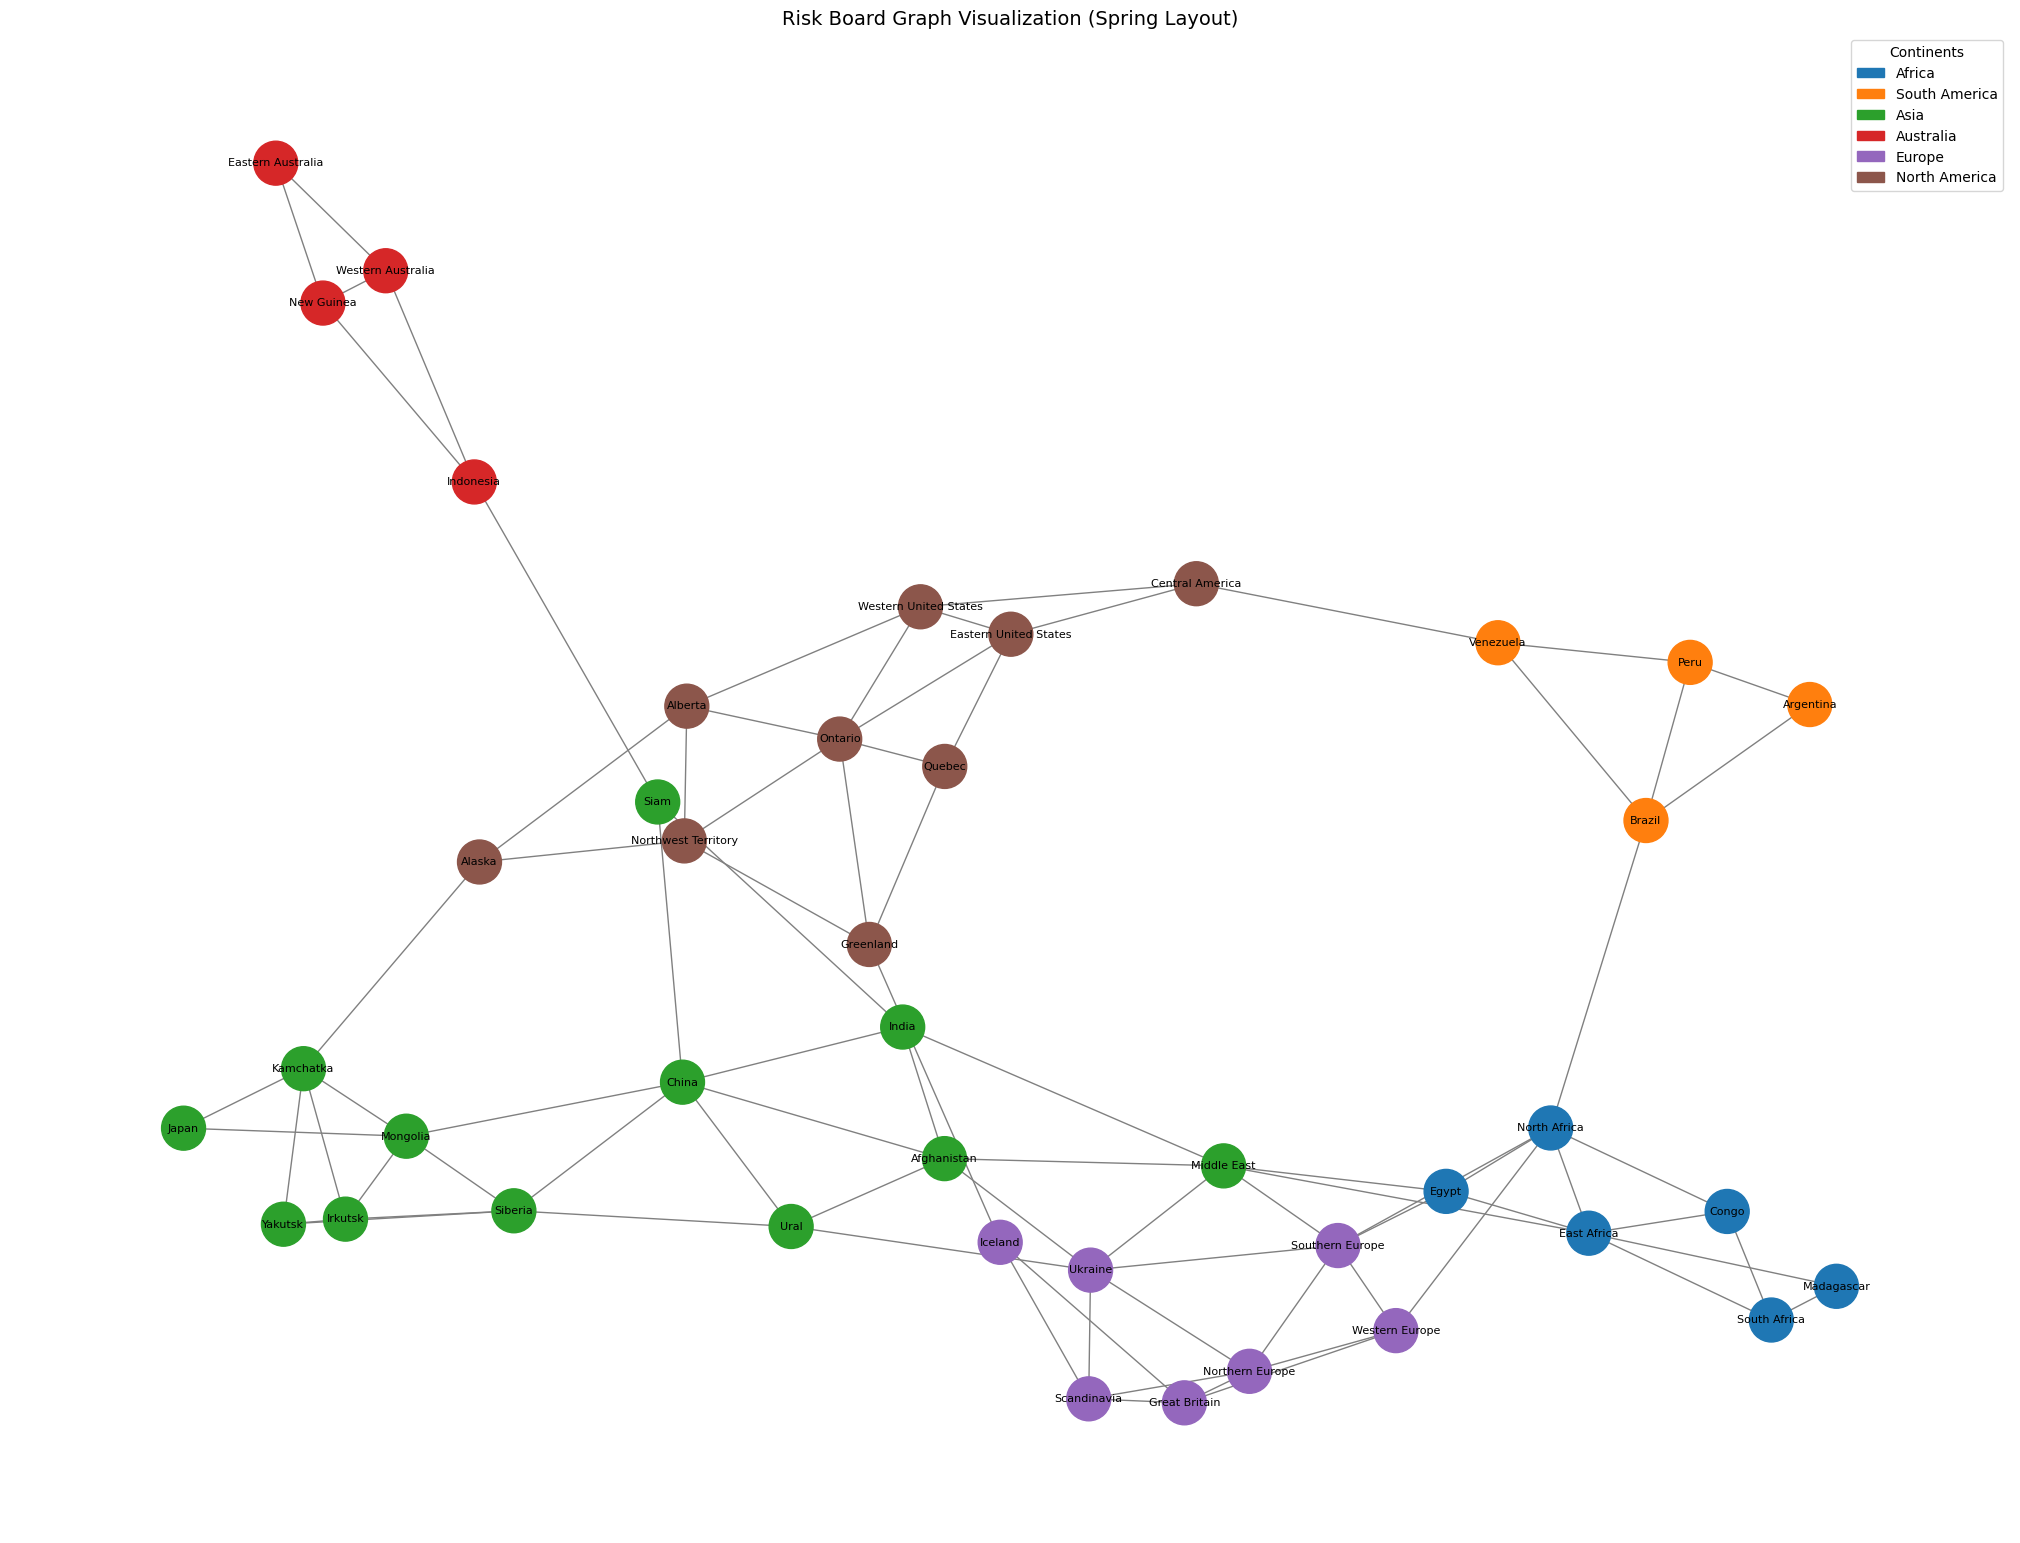

In [14]:
def visualize_risk_graph(G, layout_type='spring'):
    """
    Create a visualization of the Risk board graph with continents colored differently.
    
    Parameters:
        G (nx.Graph): NetworkX graph of the Risk board
        layout_type (str): The type of layout to use for visualization. Options include:
                           'spring', 'circular', 'kamada_kawai', 'random', 'shell'
    """
    # Define layout options
    layouts = {
        'spring': nx.spring_layout,
        'circular': nx.circular_layout,
        'kamada_kawai': nx.kamada_kawai_layout,
        'random': nx.random_layout,
        'shell': nx.shell_layout
    }
    
    # Ensure the selected layout is valid
    if layout_type not in layouts:
        raise ValueError(f"Invalid layout_type. Choose from {list(layouts.keys())}")
    
    # Get the layout function and compute positions
    pos = layouts[layout_type](G)
    
    # Assign a unique color to each continent
    continents = set(nx.get_node_attributes(G, 'continent').values())
    continent_colors = {continent: color for continent, color in zip(continents, sns.color_palette('tab10', len(continents)))}
    
    # Create a list of node colors based on their continent
    node_colors = [continent_colors[G.nodes[node]['continent']] for node in G.nodes]
    
    # Plot the graph
    plt.figure(figsize=(20, 15))
    nx.draw(
        G, 
        pos, 
        with_labels=True, 
        labels={node: node for node in G.nodes},  
        node_color=node_colors, 
        node_size=1000,  
        font_size=8,
        font_color='black', 
        edge_color='gray'
    )
    
    # Create a legend for the continents
    legend_handles = [mpl.patches.Patch(color=color, label=continent) for continent, color in continent_colors.items()]
    plt.legend(handles=legend_handles, title="Continents", loc='best')
    
    # Add a title to the plot
    plt.title(f"Risk Board Graph Visualization ({layout_type.capitalize()} Layout)", fontsize=14)
    plt.show()

# Visualize the graph
visualize_risk_graph(G, layout_type='spring')


&#9989; **Question 3.4 (26 points)**: Answer the following questions based on the Risk board graph visualization. Each answer should have a minimum of 1-2 sentences and snippet of the code that supports your answer. You must explain what each function in the code snippet does. 

All answers should be in the same markdown cell. 

The code snippet should be properly displayed using code markdown. 

1. Which layout type provides the best visualization of the continent-based clustering in the Risk board graph?
    - Explain the rationale behind your choice of layout.
2. Do a little research and explain what the Kamada-Kawai layout does? Make sure to cite your sources.
3. Which part of the code is used to assign the color of each node based on its continent?
4. How did you make the legend? Explain any non-obvious part of the code.
5. What colormap did you choose for the continents and how did you import the colormap? 
6. How did you set the node size and font size in the visualization?
7. How did you print the labels for the nodes? 

Which layout type provides the best visualization of the continent-based clustering in the Risk board graph?
- The `spring` layout provides the best visualization of continent-based clustering because it uses a force-directed algorithm that positions nodes in a way that minimizes edge crossings and groups connected nodes closer together. This makes it easier to visually identify clusters of territories belonging to the same continent.

- The `spring_layout` function computes positions for nodes using the Fruchterman-Reingold force-directed algorithm, which is well-suited for visualizing clusters.

```python
pos = nx.spring_layout(G)
```




Do a little research and explain what the Kamada-Kawai layout does?
- The Kamada-Kawai layout is a force-directed algorithm that positions nodes based on a spring model, where the ideal distance between nodes is proportional to their graph-theoretic distance. It minimizes energy to achieve a visually appealing layout. This layout is particularly effective for graphs with well-defined clusters.  
- Source: Kamada, T., & Kawai, S. (1989). "An algorithm for drawing general undirected graphs." *Information Processing Letters*, 31(1), 7-15.

```python
pos = nx.kamada_kawai_layout(G)
```



Which part of the code is used to assign the color of each node based on its continent?
- The following code assigns a unique color to each continent and maps it to the nodes based on their `continent` attribute.

- `sns.color_palette` generates a color palette, and the dictionary `continent_colors` maps each continent to a specific color. The list comprehension assigns the appropriate color to each node based on its continent.


```python
continent_colors = {continent: color for continent, color in zip(continents, sns.color_palette('tab10', len(continents)))}
node_colors = [continent_colors[G.nodes[node]['continent']] for node in G.nodes]
```


How did you make the legend?
- The legend was created using `matplotlib.patches.Patch` to define colored patches for each continent, and `plt.legend` to display them.

- Each `Patch` represents a continent with its corresponding color. These patches are passed to `plt.legend` to create the legend.

```python
legend_handles = [mpl.patches.Patch(color=color, label=continent) for continent, color in continent_colors.items()]
plt.legend(handles=legend_handles, title="Continents", loc='best')
```

What colormap did you choose for the continents and how did you import the colormap?
    - The colormap `tab10` from Seaborn was chosen for its distinct and visually appealing colors.
    - The `sns.color_palette` function generates a palette of 10 colors, which is sufficient for the number of continents.

    ```python
    import seaborn as sns
    sns.color_palette('tab10', len(continents))
    ```




How did you set the node size and font size in the visualization?
- The node size and font size were set using the `node_size` and `font_size` parameters in the `nx.draw` function.

```python
nx.draw(
        G, 
        pos, 
        node_size=1000,  
        font_size=8      
)
```



How did you print the labels for the nodes?
- The labels were printed by passing the `labels` parameter to the `nx.draw` function, which maps each node to its name.

- The `labels` dictionary explicitly specifies the label for each node, ensuring that the territory names are displayed on the graph.
```python
nx.draw(
        G, 
        pos, 
        with_labels=True, 
        labels={node: node for node in G.nodes}  
)
```


---
## &#128721; STOP
**Pause to commit your changes to your Git repository! (1 points)**

Take a moment to save your notebook, commit the changes to your Git repository using the commit message "**Committing Part 3**", no need to push the changes to GitHub yet, but you can if you want.

---
## Assignment wrap-up

Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credit for the assignment!**

In [15]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://forms.office.com/r/mB0YjLYvAA" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

### Congratulations, you're done!

If you like, you can upload this file to D2L for a record. Nevertheless, **we will grade the copy on GitHub**. 


&#169; Copyright 2025,  Department of Computational Mathematics, Science and Engineering at Michigan State University